<a href="https://colab.research.google.com/github/PomesHouse/SkillTreePython-DeepLearning/blob/main/04.Paper-with-code/ch04_06_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch04.06 AutoEncoder

* 날짜:
* 이름:

## 학습내용
    - AutoEncoder를 이해하고 구현한다.
    - Denoising 을 적용해 본다. 
    - 이상치 탐지를 적용해 본다. 

In [1]:
import sys, os

import numpy as np
from tensorflow.keras import layers, models
import tensorflow as tf
import matplotlib.pyplot as plt

## AutoEncoder 기본 구현
---

![](https://gaussian37.github.io/assets/img/dl/concept/autoencoder2/autoencoder.png)

### **| 모델 구성**

In [5]:

# 이미지 -> 이미지 (자기 자신이 나와야 한다) norm : x/255 x 값이 0~1사이 (0 도는 1이 아님!)

# mnist: 28 x 28 = 786
def create_model(input_dims = 784):
    # encoder
    x = layers.Input(shape = input_dims, name = 'x')
    z = layers.Dense(128, activation = 'relu')(x)
    z = layers.Dense(64, activation = 'relu')(z)
    z = layers.Dense(16, activation = 'relu')(z)
    encoder = models.Model(x, z, name = 'Encoder')

    # decoder
    y = layers.Dense(64, activation = 'relu' )(z)
    y = layers.Dense(128, activation = 'relu' )(y)
    y = layers.Dense(input_dims, activation = 'sigmoid' )(y)
    decoder = models.Model(z, y, name = 'Decoder')

    # AutoEncoder
    z = encoder(x)
    y = decoder(z)
    model=  models.Model(x, y, name = 'AutoEncoder')
    model.compile(loss = 'mse',
                  optimizer = 'adam')

    model.summary()
    return encoder, decoder, model

############################################

def create_cnnbase(input_dims = (28, 28, 1)):
    # encoder
    x = layers.Input(shape = input_dims)
    z = layers.Conv2D(32, kernel_size = (3, 3), padding = 'same', activation = 'relu')(x)
    z = layers.Conv2D(16, kernel_size = (3, 3), padding = 'same', activation = 'relu')(z)
    z = layers.Conv2D(8, kernel_size= (3, 3), padding = 'same', activation = 'relu')(z)
    encoder = models.Model(x, z, name = 'CNN_Encoder')

    # decoder
    y = layers.Conv2D(16, kernel_size = (3, 3), padding = 'same', activation = 'relu')(z)
    y = layers.Conv2D(32, kernel_size = (3, 3), padding = 'same', activation = 'relu')(y)
    y = layers.Conv2D(1, kernel_size = (3, 3), padding = 'same', activation = 'sigmoid')(y)
    decoder = models.Model(z, y, name = 'CNN_Decoder')

    # AutoEncoder
    z = encoder(x)
    y = decoder(z)
    model = models.Model(x, y, name = 'CNN_AutoEncoder')
    model.compile(loss = 'mse',
                  optimizer = 'adam')
    
    model.summary()
    return encoder, decoder, model

encoder, decoder, model = create_model()
cnn_encoder, cnn_decoder, cnn_model = create_cnnbase()

Model: "AutoEncoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 x (InputLayer)              [(None, 784)]             0         
                                                                 
 Encoder (Functional)        (None, 16)                109776    
                                                                 
 Decoder (Functional)        (None, 784)               110544    
                                                                 
Total params: 220,320
Trainable params: 220,320
Non-trainable params: 0
_________________________________________________________________
Model: "CNN_AutoEncoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 CNN_Encoder (Functional

### **| 학습**

In [74]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#norm
x_train = x_train / 255.
x_test = x_test / 255.

#flatten
x_train = x_train.reshape( (60000, -1) )
x_test = x_test.reshape( (10000, -1) )

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [36]:
history = model.fit(x_train, x_train, epochs = 50, batch_size = 128)

Epoch 1/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0511
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0261
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0225
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0207
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0196
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0185
Epoch 7/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0176
Epoch 8/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0169
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0162
Epoch 10/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0155
Epoch 11/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0151
Epoch 12/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0148
Epoch 13/50
469/469 [=

In [6]:
(x_train_cnn, y_train_cnn), (x_test_cnn, y_test_cnn) = tf.keras.datasets.mnist.load_data()

#norm
x_train_cnn = x_train_cnn / 255.
x_test_cnn = x_test_cnn / 255.

cnn_history = cnn_model.fit(x_train_cnn, x_train_cnn, epochs = 25, batch_size = 128)

Epoch 1/25
469/469 [==============================] - 4s 7ms/step - loss: 0.0107
Epoch 2/25
469/469 [==============================] - 3s 7ms/step - loss: 2.8814e-04
Epoch 3/25
469/469 [==============================] - 3s 7ms/step - loss: 1.9311e-04
Epoch 4/25
469/469 [==============================] - 3s 7ms/step - loss: 1.4592e-04
Epoch 5/25
469/469 [==============================] - 3s 7ms/step - loss: 1.1529e-04
Epoch 6/25
469/469 [==============================] - 4s 9ms/step - loss: 9.0474e-05
Epoch 7/25
469/469 [==============================] - 4s 8ms/step - loss: 7.1654e-05
Epoch 8/25
469/469 [==============================] - 3s 7ms/step - loss: 5.8708e-05
Epoch 9/25
469/469 [==============================] - 3s 7ms/step - loss: 4.5852e-05
Epoch 10/25
469/469 [==============================] - 3s 7ms/step - loss: 3.9190e-05
Epoch 11/25
469/469 [==============================] - 3s 7ms/step - loss: 3.4488e-05
Epoch 12/25
469/469 [==============================] - 3s 7ms/step 

In [47]:
# history.history 자체가 딕셔너리

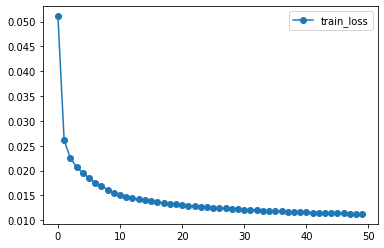

In [45]:
l = history.history['loss']
plt.plot(l, marker = 'o', label = 'train_loss')
plt.legend()
plt.show()

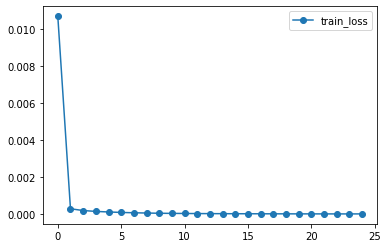

In [9]:
l_cnn = cnn_history.history['loss']
plt.plot(l_cnn, marker = 'o', label = 'train_loss')
plt.legend()
plt.show()

### **| 결과 확인**

In [51]:
x_recon = model.predict(x_test)
x_test.shape, x_recon.shape

((10000, 784), (10000, 784))

In [13]:
def display_res(org, rec):
    plt.figure(figsize = (15, 3))
    for i in range(10):
        plt.subplot(2, 10, i + 1)
        plt.imshow(org[i].reshape(28, 28), cmap = 'gray_r')
        plt.axis('off')
        plt.subplot(2, 10 , 11 +i)
        plt.imshow(rec[i].reshape(28, 28), cmap = 'gray_r')
        plt.axis('off')
    plt.show()

display_res(x_test, x_recon)

In [53]:
z = encoder(x_test[:1000])
z.shape

TensorShape([1000, 16])

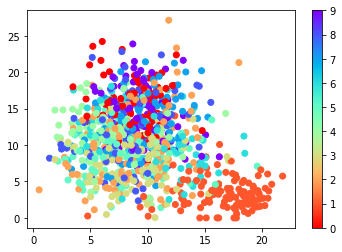

In [54]:
plt.scatter(z[:, 1], z[:, 2], c = y_test[:1000], cmap = 'rainbow_r')
plt.colorbar()

In [17]:
y_test_cnn.shape

(10000,)

(10000, 28, 28) (10000, 28, 28, 1)


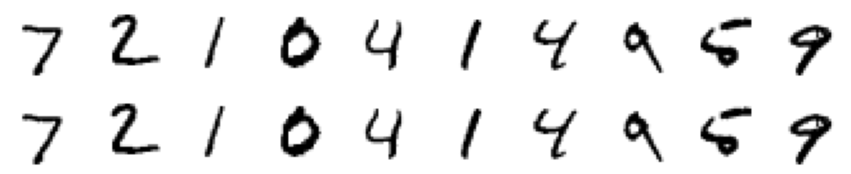

(1000, 28, 28, 8)


In [19]:
x_recon_cnn = cnn_model.predict(x_test_cnn)
print(x_test_cnn.shape, x_recon_cnn.shape)

display_res(x_test_cnn, x_recon_cnn)

z_cnn = cnn_encoder(x_test_cnn[:1000])
print(z_cnn.shape)

# plt.scatter(z_cnn[:, 1], z_cnn[:, 2], c = y_test_cnn, cmap = 'rainbow_r')
# plt.colorbar()

## AutoEncoder 활용 - Denoising
---

### **| 데이터 준비**

(60000, 784) (10000, 784)


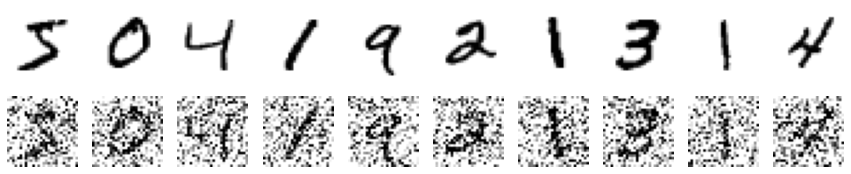

In [61]:
train_noisy = np.random.normal(size = x_train.shape)
test_noisy = np.random.normal(size = x_test.shape)

factor = 0.6
x_train_noisy = x_train + train_noisy * factor
x_test_noisy = x_test + test_noisy * factor

# 0 ~ 1 범위를 벗어나지 않도록
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(train_noisy.shape, test_noisy.shape)
display_res(x_train, x_train_noisy)

(60000, 28, 28) (10000, 28, 28)


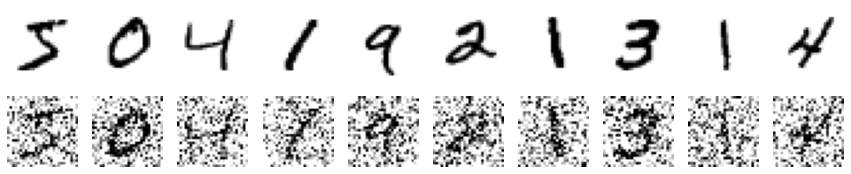

In [21]:
train_noisy_cnn = np.random.normal(size = x_train_cnn.shape)
test_noisy_cnn = np.random.normal(size = x_test_cnn.shape)

factor = 0.6
x_train_noisy_cnn = x_train_cnn + train_noisy_cnn * factor
x_test_noisy_cnn = x_test_cnn + test_noisy_cnn * factor

# 0 ~ 1 범위를 벗어나지 않도록
x_train_noisy_cnn = np.clip(x_train_noisy_cnn, 0., 1.)
x_test_noisy_cnn = np.clip(x_test_noisy_cnn, 0., 1.)

print(train_noisy_cnn.shape, test_noisy_cnn.shape)
display_res(x_train_cnn, x_train_noisy_cnn)

### **| 훈련**

In [62]:
history = model.fit(x_train_noisy, x_train, epochs = 50, batch_size = 128)

Epoch 1/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0316
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0249
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0237
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0229
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0224
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0221
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0218
Epoch 8/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0215
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0213
Epoch 10/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0211
Epoch 11/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0210
Epoch 12/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0208
Epoch 13/50
469/469 [====

In [24]:
history_cnn = cnn_model.fit(x_train_noisy_cnn, x_train_cnn, epochs = 25, batch_size = 128)

Epoch 1/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1120
Epoch 2/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1120
Epoch 3/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1120
Epoch 4/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1120
Epoch 5/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1120
Epoch 6/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1120
Epoch 7/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1120
Epoch 8/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1120
Epoch 9/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1120
Epoch 10/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0831
Epoch 11/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0171
Epoch 12/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0159
Epoch 13/25
469/469 [====

### **| 결과 확인**

In [63]:
x_recon = model.predict(x_test_noisy)
x_recon.shape, x_test_noisy.shape

((10000, 784), (10000, 784))

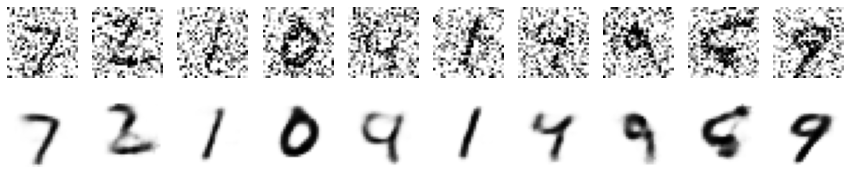

In [64]:
display_res(x_test_noisy, x_recon)

(10000, 28, 28, 1) (10000, 28, 28)


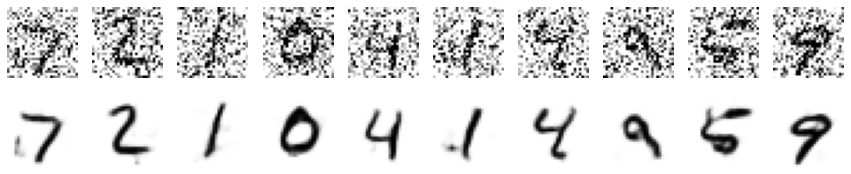

In [25]:
x_recon_cnn = cnn_model.predict(x_test_noisy_cnn)
print(x_recon_cnn.shape, x_test_noisy_cnn.shape)
display_res(x_test_noisy_cnn, x_recon_cnn)

## AutoEncoder 활용 - 이상치 탐지
---

### **| 모델 구성**

### **| 데이터 준비**


### **| 훈련**

### **| 결과 확인**